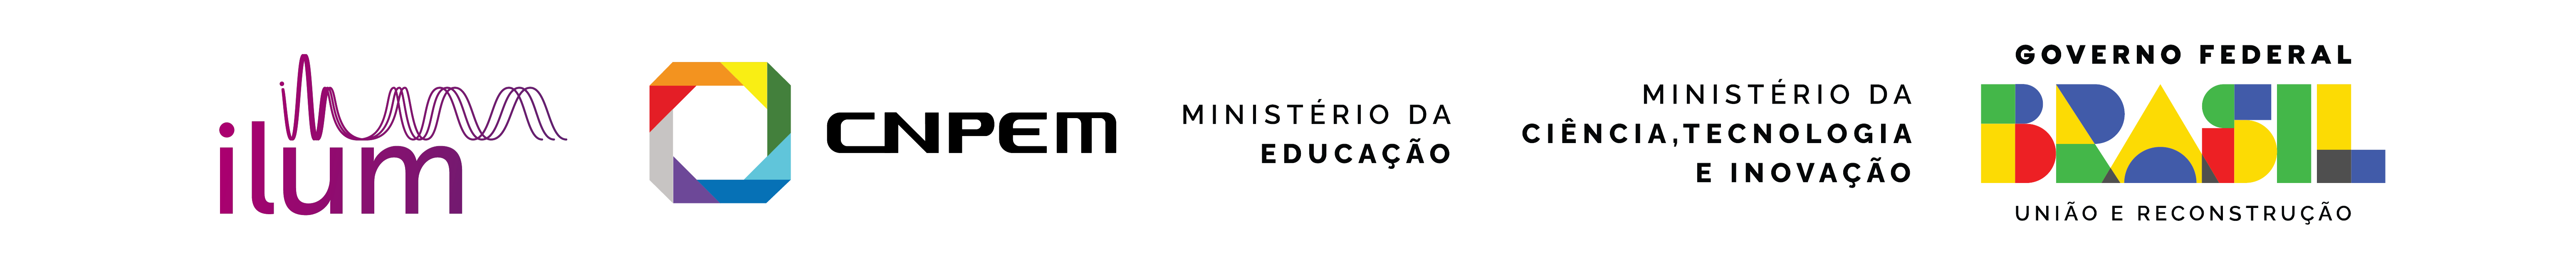

## <center> Construção de dados fuzzy triângulares a partir de um conjunto de dados reais
    
**Autoria:** `Letícia Nunes` <br>
**Revisão:** `Vinícius Francisco Wasques`
    
---

<div class= 'alert alert-warning'> <b>ATENÇÃO!</b></div>

O propósito desse caderno é esclarecer como se dá a "_fuzzyficação_" de dados reais. Tudo que está sendo feito abaixo pode ser realizado de maneira automática usando a função `turn_fuzzy` do script `Fuzzy_functions` que está disponível no [Github](https://github.com/leticiaalmnunes/MQMFuzzy_HubbleLaw) do projeto.

---

### Introdução

<center> $\bullet$ <b>Passo a passo:</b> </center>

i. <b>Ajuste de curva clássico</b><br>
Para exemplificarmos o processo, usamos um conjunto de dados que tem um comportamento linear e, por isso, usamos uma função afim ($y=ax+b$) para calcularmos o diâmetro dos números fuzzy. Ou seja, a função mais adequada para o ajuste vai depender dos dados sendo utilizados em cada problema, podendo ser um polinômio de grau maior que um, uma função periódica, exponencial etc. <br><br>

ii. <b>Cálculo do erro absoluto</b><br>
A partir dos coeficientes $a$ e $b$ encontrados, foi possível obter os valores de $y$ previstos pela função para cada dado de entrada e obter o erro absoluto ($\sigma$) para cada dado.

$$\sigma = \left| y_{\text{previsto}} - y_{\text{real}} \right| $$


iii. <b>Criação dos números fuzzy</b><br>
Usamos aqui o formato mais simples de número fuzzy: o triângulo equilátero. Assim, temos que $\text{diam}(Y) = 2\sigma$ e:

$$Y = (y_{\text{real}}-\sigma, \ y_{\text{real}}, \ y_{\text{real}}+\sigma)$$

iv. <b>Geração do novo dataset</b><br>
Texto. <br><br>

v. <b>Função final</b>  <br>
Como exemplo, usamos alguns dados do satélite Hubble que foram extraídos do artigo (Wendy L. Freedman et al 2001) e disponibilizados em um [repositório GitHub](https://github.com/lrochacastro/Projeto-Final-Introducao-a-Computacao-em-Fisica) público. Esses dados precisaram passar por um breve tratamento antes de serem importados neste caderno e você pode encontrar o arquivo pronto para ser processado no [nosso Git](https://github.com/LuzMendes/Metodos-de-Quadrados-Minimos-Fuzzy).

### Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Script disponível no GitHub
import Fuzzy_functions as Ff

### Tratamento dos dados

In [2]:
df = pd.read_csv('data_Hubble.txt')
df.columns = ['Distância (Mpc)', 'Velocidade (km/s)'] # dando nome às colunas
display(df)

,Distância (Mpc),Velocidade (km/s)
0,56.0,4124
1,58.0,4227
2,66.8,4847
3,71.8,3424
4,77.9,5434
5,82.4,6673
6,88.6,5935
7,96.7,7241
8,102.1,7765
9,117.1,9801


### Visualizando os dados

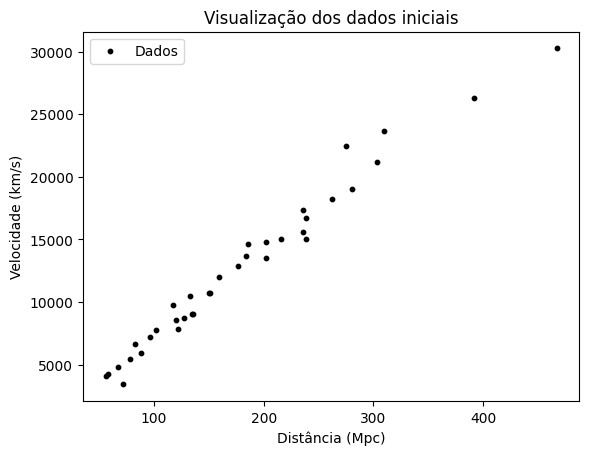

In [3]:
X = df['Distância (Mpc)']
y_true = df['Velocidade (km/s)']

plt.scatter(X, y_true, color='black', s=10, label='Dados')
plt.title('Visualização dos dados iniciais')
plt.xlabel('Distância (Mpc)')
plt.ylabel('Velocidade (km/s)')
plt.legend();

### Ajuste linear clássico

In [4]:
a, b = np.polyfit(X, y_true, deg=1)
print(a)
y_prev = a*X +b

67.82251608596026


In [5]:
a, = np.linalg.lstsq(np.array(X).reshape(-1,1), np.array(y_true), rcond=None)[0]
print("Coeficiente angular a =", a)

Coeficiente angular a = 70.13864036618583


In [6]:
a = (y_true/X).mean()
a

71.08878613405325

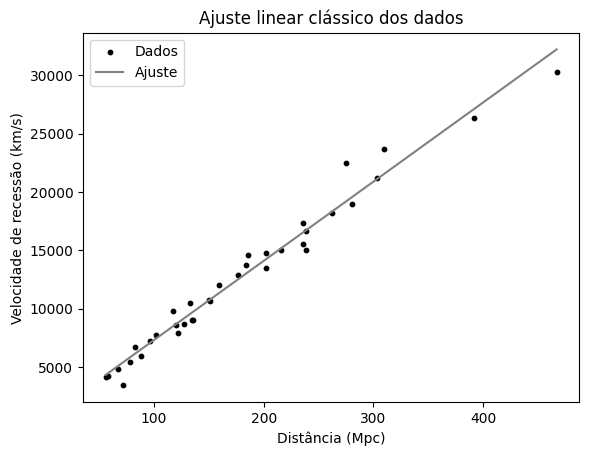

In [7]:
plt.scatter(X, y_true, color='black', s=10, label='Dados')
plt.plot(X, y_prev, color='grey', label='Ajuste')    

plt.title('Ajuste linear clássico dos dados')
plt.xlabel('Distância (Mpc)')
plt.ylabel('Velocidade de recessão (km/s)')
plt.legend();

Agora, construiremos os números fuzzy como triângulos equiláteros, usando o erro absoluto do ajuste para cada ponto como metade do diâmetro do respectivo ponto.

In [8]:
meio_diametro = []

for y_t, y_p in zip(y_true, y_prev):
    meio_diametro.append(abs(y_t-y_p))

Y = Ff.cria_fuzzy_tri_eq(y_true, meio_diametro)

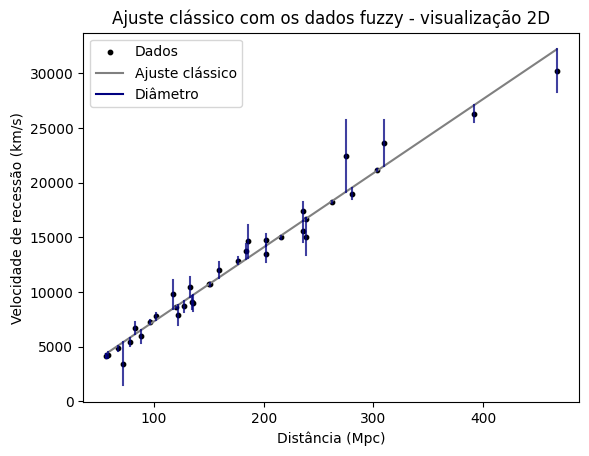

In [9]:
plt.scatter(X, y_true, color='black', s=10, label='Dados')
plt.plot(X, y_prev, color='grey', label='Ajuste clássico')    

for i, x in enumerate(X):
    if i == 0:
        plt.plot((x,x,x), Y[i], color='navy', label='Diâmetro')
    else:
        plt.plot((x,x,x), Y[i], color='navy', alpha=.75)

plt.title('Ajuste clássico com os dados fuzzy - visualização 2D')
plt.xlabel('Distância (Mpc)')
plt.ylabel('Velocidade de recessão (km/s)')
plt.legend();

### Construindo um novo dataframe com os dados fuzzy

In [10]:
df_fuzzy = pd.DataFrame()
df_fuzzy['Distância (Mpc)'] = X
df_fuzzy['Velocidade (km/s)'] = Y

display(df_fuzzy)

,Distância (Mpc),Velocidade (km/s)
0,56.0,"(3920.361663865093, 4124, 4327.638336134907)"
1,58.0,"(3990.7166316931725, 4227, 4463.2833683068275)"
2,66.8,"(4633.878490136723, 4847, 5060.121509863277)"
3,71.8,"(1448.7659097069209, 3424, 5399.234090293079)"
4,77.9,"(5055.048561582563, 5434, 5812.951438417437)"
5,82.4,"(6118.152760804259, 6673, 7227.847239195741)"
6,88.6,"(5331.347639462789, 5935, 6538.652360537211)"
7,96.7,"(7088.01474083349, 7241, 7393.98525916651)"
8,102.1,"(7454.256327697675, 7765, 8075.743672302325)"
9,117.1,"(8471.594068987079, 9801, 11130.405931012921)"


---

### Criando a função

Unindo os passos que foram executados nas células acima, chegamos na seguinte função:

In [11]:
def turn_fuzzy (df):
    """A partir de um conjunto de dados com valores reais, com uma variável independente 'x' e uma dependente 'y',
    transforma os valores de 'y' em números fuzzy triangulares equiláteros por meio de um ajuste linear clássico.
    
    Args:
        df: Tabela com os dados no formato de números reais. Pandas DataFrame.
    """
    cols = df.columns
    assert len(cols)==2
    
    X, y_true = df[cols[0]], df[cols[1]]
    
    # Ajuste linear
    a, b = np.polyfit(X, y_true, deg=1)
    y_prev = a*X +b
    
    # "Fuzzyficando"
    meio_diametro = [abs(y_t-y_p) for y_t, y_p in zip(y_true, y_prev)]
    Y = Ff.cria_fuzzy_tri_eq(y_true, meio_diametro)
    
    # Novo dataframe
    df_fuzzy = pd.DataFrame()
    df_fuzzy[0] = X
    df_fuzzy[1] = Y
    df_fuzzy.columns = cols
    
    return df_fuzzy

In [12]:
df = pd.read_csv('data_Hubble.txt')
df_Fuzzy = turn_fuzzy(df)
display(df_Fuzzy)

# df_Fuzzy.to_csv('Hubble_fuzzy.txt', index=False) ### descomente essa linha para salvar um arquivo txt como os novos dados

,0,1
0,56.0,"(3920.361663865093, 4124, 4327.638336134907)"
1,58.0,"(3990.7166316931725, 4227, 4463.2833683068275)"
2,66.8,"(4633.878490136723, 4847, 5060.121509863277)"
3,71.8,"(1448.7659097069209, 3424, 5399.234090293079)"
4,77.9,"(5055.048561582563, 5434, 5812.951438417437)"
5,82.4,"(6118.152760804259, 6673, 7227.847239195741)"
6,88.6,"(5331.347639462789, 5935, 6538.652360537211)"
7,96.7,"(7088.01474083349, 7241, 7393.98525916651)"
8,102.1,"(7454.256327697675, 7765, 8075.743672302325)"
9,117.1,"(8471.594068987079, 9801, 11130.405931012921)"


---

### Referências

1. <b> Dados do Hubble Telescope (Wendy L. Freedman et al 2001).</b> https://iopscience.iop.org/article/10.1086/320638

2. <b>Repositório que extraiu os dados do artigo e disponibilizou. (Castro L., 2024) </b> https://github.com/lrochacastro/Projeto-Final-Introducao-a-Computacao-em-Fisica

---